In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.graph_objects as go
from sklearn import metrics

df = pd.read_csv('https://gitlab.com/renaxx12/mineria-de-datos/-/raw/main/fetal_health.csv?ref_type=heads')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [3]:
df.loc[df['fetal_health'] == 3, 'fetal_health'] = 2


Ahora solo tendrá 2 clases. 1 corresponde a normal y 2 a patológico o sospechoso.

/tmp/ipykernel_5238/2968684130.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  fh_status = sns.countplot(x='fetal_health', data=df, palette='coolwarm')


Text(0, 0.5, 'Count')

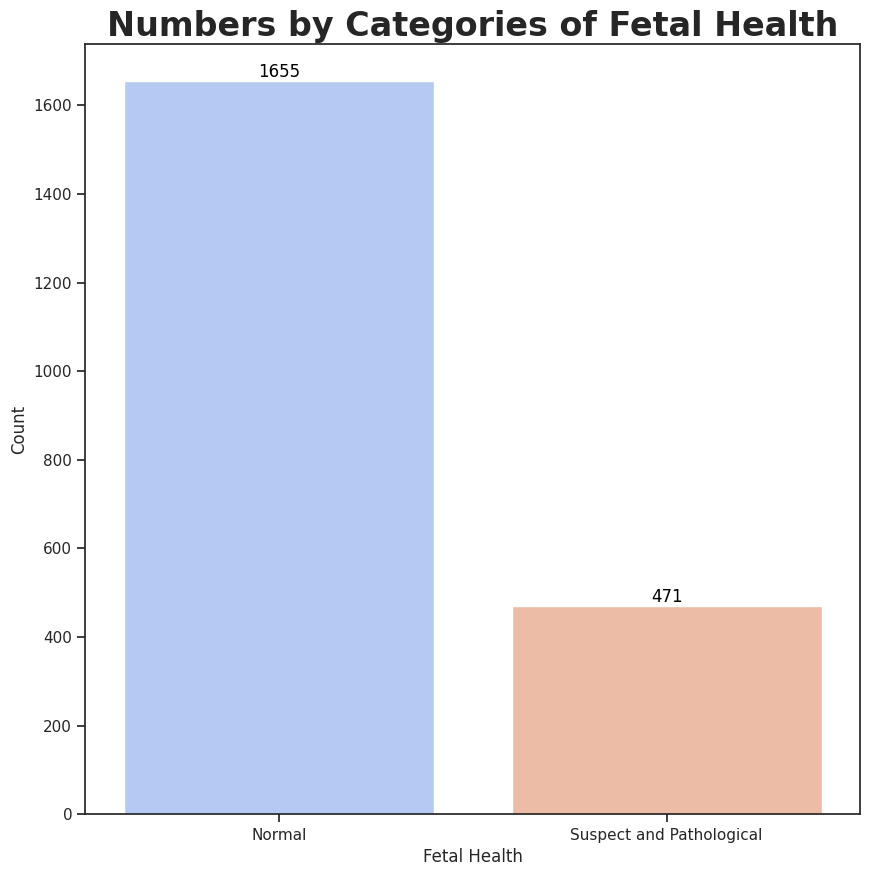

In [4]:
sns.set(style='ticks')
plt.figure(figsize=(10, 10))
fh_status = sns.countplot(x='fetal_health', data=df, palette='coolwarm')

for number, count in enumerate(df['fetal_health'].value_counts()):
    fh_status.text(number, count, str(count), ha='center', va='bottom', fontsize=12, color='black')
    
plt.title('Numbers by Categories of Fetal Health',
          fontsize=24,
          fontweight='bold')

plt.xticks([0, 1], ['Normal', 'Suspect and Pathological'])
plt.xlabel('Fetal Health')
plt.ylabel('Count')

Text(0.5, 1.0, 'Correlación de datos numéricos y la salud fetal')

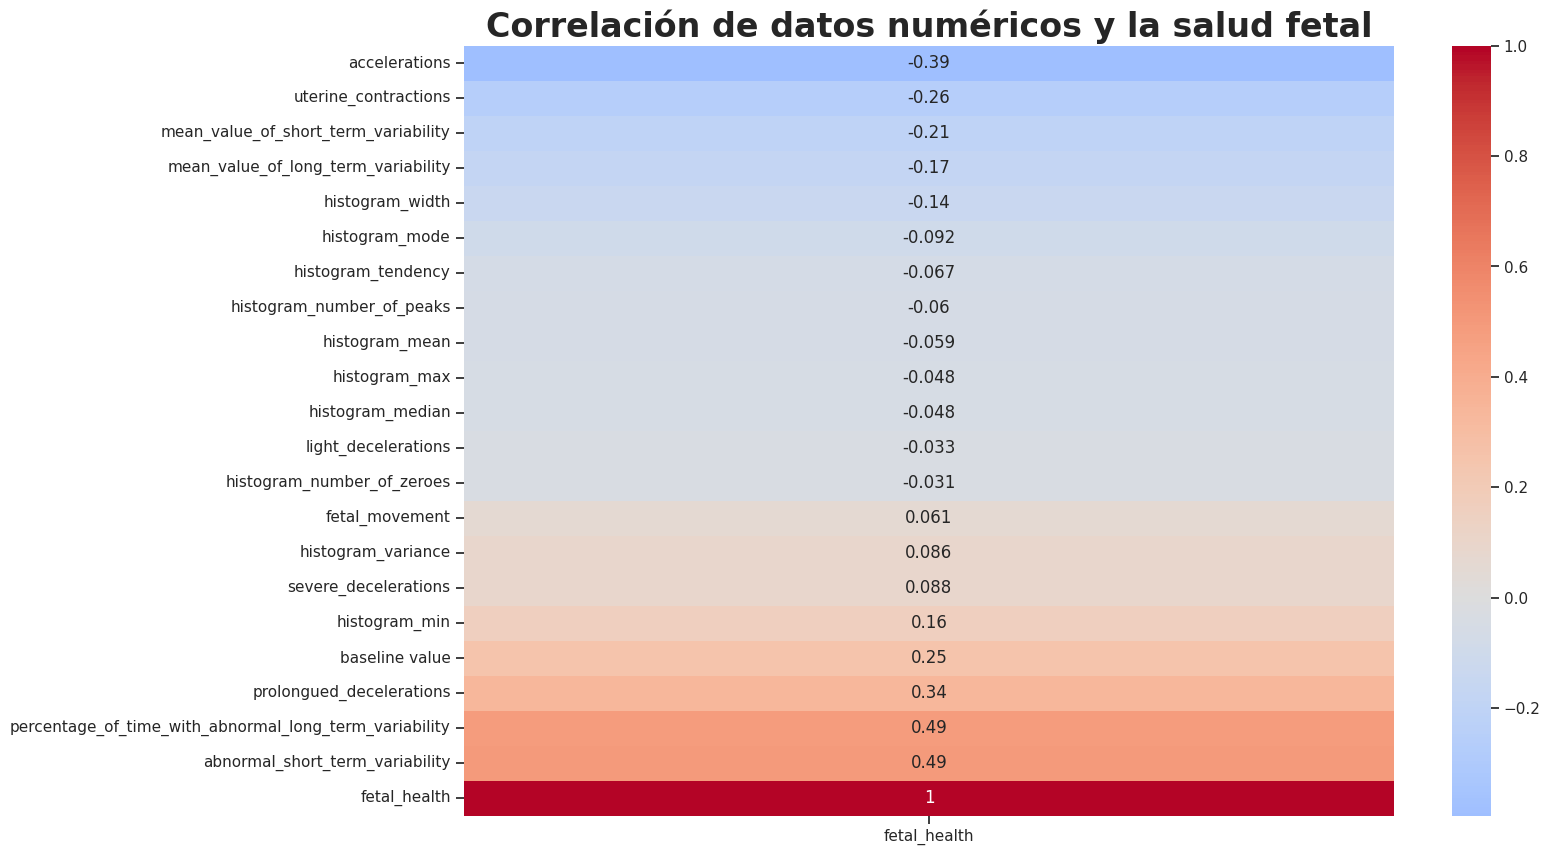

In [5]:
correlation_matrix = df.corr()['fetal_health']

plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix.sort_values().to_frame(), annot=True, cmap='coolwarm', center=0)

plt.title("Correlación de datos numéricos y la salud fetal",
                    fontsize=24,
                    fontweight="bold")

Usé los 4 atributos con más correlación según las clases.

In [6]:

atributo_columnas =['abnormal_short_term_variability', 'percentage_of_time_with_abnormal_long_term_variability', 'prolongued_decelerations', 'baseline value'] # Creamos un variable para los atributos con los nombres de cada uno
X =df[atributo_columnas] # Se guarda la data de atributos en una variable llamada "X", este guarda las columnas con los nombres que están en la vaiable "atributo_columnas"
Y=df['fetal_health']



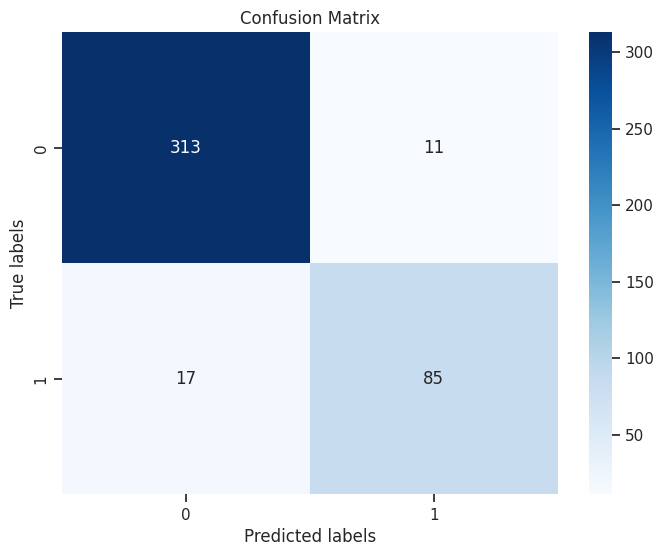

Accuracy: 0.9342723004694836
Recall: 0.8996913580246914
Precision: 0.9169507575757576


In [30]:
from sklearn.tree import DecisionTreeClassifier # Importamos la función para el árbol de decisión de scikit-learn
from sklearn.model_selection import train_test_split # Importamos la función que divida la data en los set de entrenamiento y validación, crea los distintos set

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20) # Dividimos la data en el 80-20 que se mencionó anteriormente, para los set de entrenamiento y validación
dtree=DecisionTreeClassifier() # Se crea un objeto como árbol de decisión
dtree.fit(X_train, y_train) # Entregamos la data al árbol de decisión con la función "fit", data de atributos y de clases, creamos el arbol

y_pred = dtree.predict(X_test) # Obtenemos una variable con la data que logra predecir el modelo a partir de los atributos en X_test que corresponden al 20%, esto lo hace la funcion "predict"

from sklearn.metrics import confusion_matrix # Importamos el objeto de "confusion_matrix" que nos entrega scikit-learn
# Creamos la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Creamos una figura y ejes de matplotlib
plt.figure(figsize=(8, 6))

# Usamos seaborn para crear un mapa de calor de la matriz de confusión
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')

# Añadimos etiquetas y título
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')

# Mostramos la matriz de confusión
plt.show()

print("Accuracy:",metrics.accuracy_score(y_test, y_pred)) # Creamos métrica de "Accuracy" y mostramos
print("Recall:",metrics.recall_score(y_test,y_pred,average='macro')) # Creamos métrica de "Recall" y mostramos
print("Precision:",metrics.precision_score(y_test,y_pred,average='macro')) # Creamos métrica de "Precision" y mostramos


---------------------------------------------------------- Metricas ----------------------------------------------------------
 
[[321   7]
 [ 19  79]]
 
 
------------------------------------------------- Validación cruzada 10 veces -----------------------------------------------
 


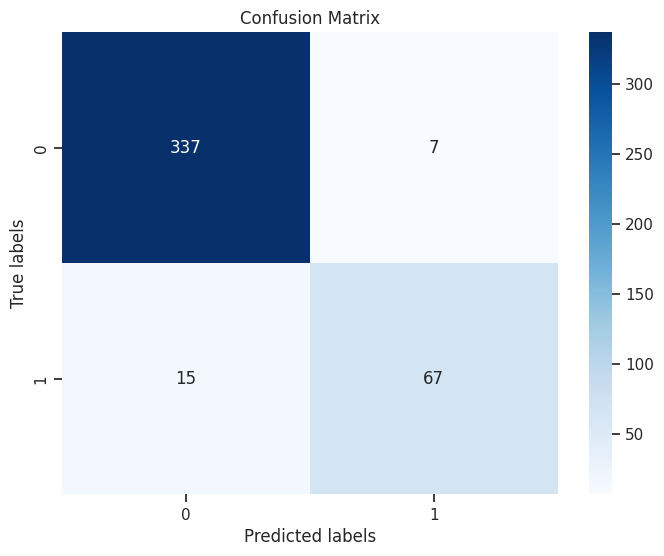

Accuracy: 0.9483568075117371
Recall: 0.8983621667612025
Precision: 0.9313958845208845


In [34]:
from sklearn.ensemble import RandomForestClassifier # Importamos la función para el bosque aleatorio de scikit-learn
from sklearn.model_selection import train_test_split # Importamos la función que divida la data en los set de entrenamiento y validación, crea los distintos set
from sklearn import metrics # Importamos las funciones de las métricas desde scikit-learn
from sklearn.metrics import confusion_matrix # Importamos el objeto de "confusion_matrix" que nos entrega scikit-learn

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20) # Se divide la data en un 80-20
RB=RandomForestClassifier() # Se crea un objeto como bosque aleatorio
RB.fit(X_train,y_train) # Entregamos la data al bosque aleatorio con la función "fit", data de atributos y de clases, creamos el arbol

y_pred = RB.predict(X_test) # Obtenemos una variable con la data que logra predecir el modelo a partir de los atributos en X_test que corresponden al 20%, esto lo hace la funcion "predict"

print("---------------------------------------------------------- Metricas ----------------------------------------------------------")
print (" ")
print(confusion_matrix(y_test,y_pred)) # Podemos visualizar la matriz de confusión, que es una herramienta común para la determinación de qué tan bien generaliza nuestro model
print (" ")

print (" ")

print ("------------------------------------------------- Validación cruzada 10 veces -----------------------------------------------")
print (" ")
intr = range(0,10) # Arreglo con numeros 10 numeros que mos ayudara en el ciclo
scores = [] # Arreglopara guardar los scores
for i in intr: # Ciblo para crear cada arbol y guardar los scores
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=i) # Se divide la data en un 80-20
    RB=RandomForestClassifier() # Se crea un objeto como bosque aleatorio
    RB.fit(X_train, y_train)
    y_pred = RB.predict(X_test) # Se guarda la prediccion
    scores.append(metrics.accuracy_score(y_test, y_pred,)) # Se calcula el valor de "accuracy" de la prediccion anterior y se guarda en el arreglo

scores # Mostramos los 10 puntajes para las validciones cruzadas (puntajes de las "accuracy" cazlculadas anteriormente en el ciclo)
# Creamos la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Creamos una figura y ejes de matplotlib
plt.figure(figsize=(8, 6))

# Usamos seaborn para crear un mapa de calor de la matriz de confusión
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')

# Añadimos etiquetas y título
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')

# Mostramos la matriz de confusión
plt.show()
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)) # Creamos métrica de "Accuracy" y mostramos
print("Recall:",metrics.recall_score(y_test,y_pred,average='macro')) # Creamos métrica de "Recall" y mostramos
print("Precision:",metrics.precision_score(y_test,y_pred,average='macro')) # Creamos métrica de "Precision" y mostramos


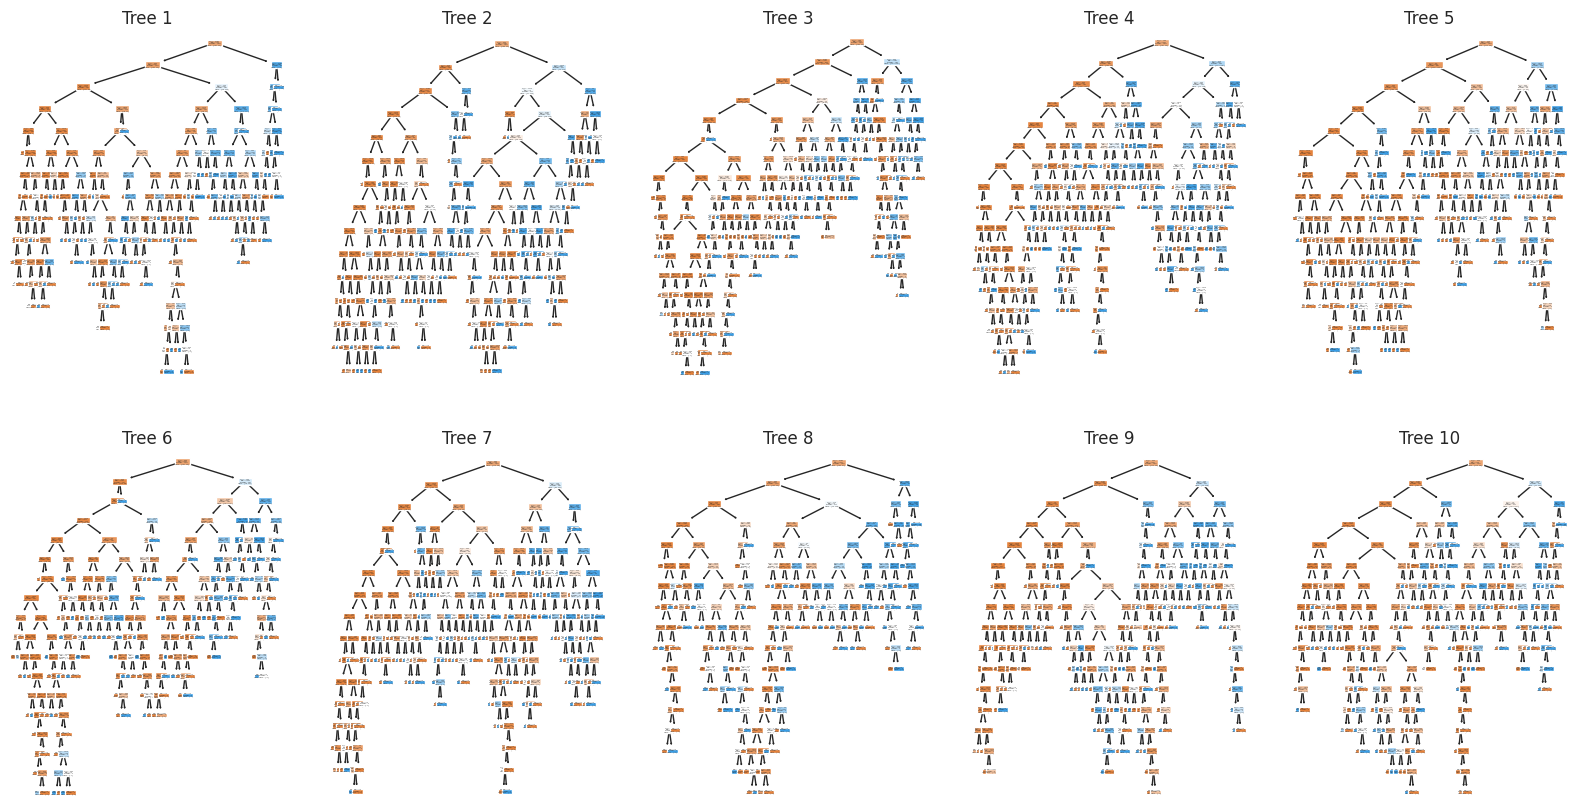

In [9]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

RB=RandomForestClassifier()
RB.fit(X_train,y_train)

plt.figure(figsize=(20,10)) #Creamos una figura de 20x10
for i in range(10): # El numero de arboles es 10
    plt.subplot(2, 5, i+1) # Dividimos la figura en 10 partes
    plot_tree(RB.estimators_[i], filled=True) # Mostramos el arbol actual
    plt.title("Tree {}".format(i+1)) # Colocamos el titulo correspondiente
plt.show()

---------------------------------------------------------- Metricas ----------------------------------------------------------
 


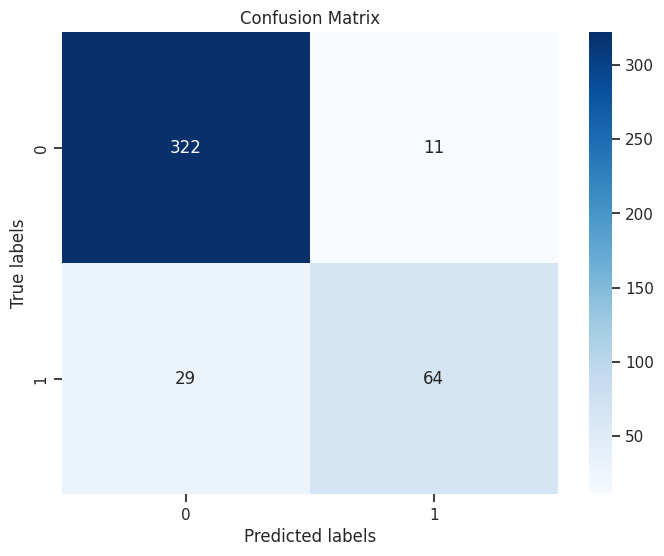

 
Accuracy: 0.9061032863849765
Recall: 0.8275695049888598
Precision: 0.8853561253561254
 
------------------------------------------------- Validación cruzada 10 veces -----------------------------------------------
 


[0.8873239436619719,
 0.92018779342723,
 0.9014084507042254,
 0.9225352112676056,
 0.8826291079812206,
 0.8967136150234741,
 0.9154929577464789,
 0.903755868544601,
 0.8967136150234741,
 0.9084507042253521]

In [27]:
from sklearn.neighbors import KNeighborsClassifier # Importamos la función para K-Nearest-Neighbor de scikit-learn
from sklearn.model_selection import train_test_split # Importamos la función que divida la data en los set de entrenamiento y validación, crea los distintos set
from sklearn import metrics # Importamos las funciones de las métricas desde scikit-learn
from sklearn.metrics import confusion_matrix # Importamos el objeto de "confusion_matrix" que nos entrega scikit-learn

# Metodo
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20) # Se divide la data en un 80-20
knn=KNeighborsClassifier() # Se crea un objeto que representa el modelo de K-Nearest-Neighbor
knn.fit(X_train,y_train) # Entregamos la data al modelo K-Nearest-Neighbor con la función "fit", data de atributos y de clases, creamos el arbol

y_pred = knn.predict(X_test) # Obtenemos una variable con la data que logra predecir el modelo a partir de los atributos en X_test que corresponden al 20%, esto lo hace la funcion "predict"

print("---------------------------------------------------------- Metricas ----------------------------------------------------------")
print (" ")
# Creamos la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Creamos una figura y ejes de matplotlib
plt.figure(figsize=(8, 6))

# Usamos seaborn para crear un mapa de calor de la matriz de confusión
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')

# Añadimos etiquetas y título
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')

# Mostramos la matriz de confusión
plt.show()
print (" ")
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)) # Creamos métrica de "Accuracy" y mostramos
print("Recall:",metrics.recall_score(y_test,y_pred,average='macro')) # Creamos métrica de "Recall" y mostramos
print("Precision:",metrics.precision_score(y_test,y_pred,average='macro')) # Creamos métrica de "Precision" y mostramos
print (" ")

print ("------------------------------------------------- Validación cruzada 10 veces -----------------------------------------------")
print (" ")
intr = range(0,10) # Arreglo con numeros 10 numeros que nos ayudara en el ciclo
scores = [] # Arreglopara guardar los scores
for i in intr: # Ciblo para crear cada arbol y guardar los scores
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=i) # Se divide la data en un 80-20
    knn=KNeighborsClassifier() # Se crea un objeto que representa el modelo de KNN
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test) # Se guarda la prediccion
    scores.append(metrics.accuracy_score(y_test, y_pred,)) # Se calcula el valor de "accuracy" de la prediccion anterior y se guarda en el arreglo

scores # Mostramos los 10 puntajes para las validciones cruzadas (puntajes de las "accuracy" cazlculadas anteriormente en el ciclo)

/home/renata/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


---------------------------------------------------------- Metricas ----------------------------------------------------------
 


/home/renata/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


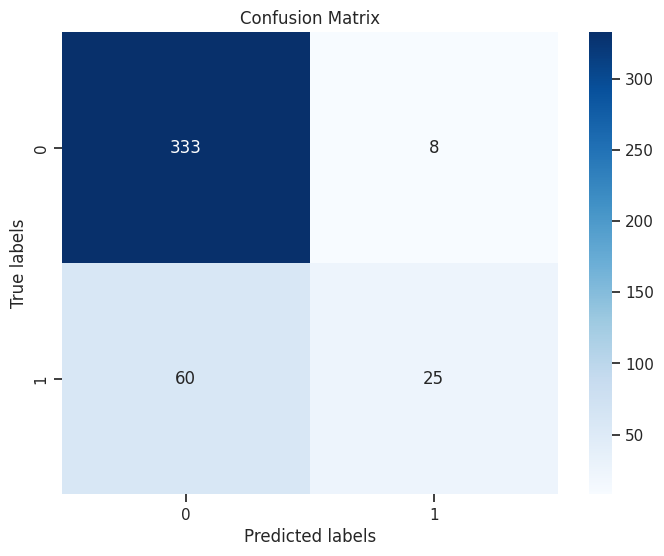

/home/renata/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


 
Accuracy: 0.8403755868544601
Recall: 0.6353286182508194
Precision: 0.8024520009252833
 
------------------------------------------------- Validación cruzada 10 veces -----------------------------------------------
 


/home/renata/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/renata/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/renata/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/renata/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/renata/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
 

[0.8333333333333334,
 0.8896713615023474,
 0.8661971830985915,
 0.8497652582159625,
 0.8427230046948356,
 0.7934272300469484,
 0.8544600938967136,
 0.8262910798122066,
 0.8380281690140845,
 0.8615023474178404]

In [26]:
from sklearn.svm import LinearSVC # Importamos la función para el máquina de vectores de soporte lineal de scikit-learn

# Metodo
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20) # Se divide la data en un 80-20
svm=LinearSVC(multi_class="crammer_singer") # Se crea un objeto como máquina de vectores de soporte lineal
#"crammer_singer"optimiza un objetivo conjunto en todas las clases.
svm.fit(X_train,y_train) # Entregamos la data al modelo de máquina de vectores de soporte lineal con la función "fit", data de atributos y de clases, creamos el arbol

y_pred = svm.predict(X_test) # Obtenemos una variable con la data que logra predecir el modelo a partir de los atributos en X_test que corresponden al 20%, esto lo hace la funcion "predict"

print("---------------------------------------------------------- Metricas ----------------------------------------------------------")
print (" ")
# Creamos la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Creamos una figura y ejes de matplotlib
plt.figure(figsize=(8, 6))

# Usamos seaborn para crear un mapa de calor de la matriz de confusión
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')

# Añadimos etiquetas y título
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')

# Mostramos la matriz de confusión
plt.show()
print (" ")
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)) # Creamos métrica de "Accuracy" y mostramos
print("Recall:",metrics.recall_score(y_test,y_pred,average='macro')) # Creamos métrica de "Recall" y mostramos
print("Precision:",metrics.precision_score(y_test,y_pred,average='macro')) # Creamos métrica de "Precision" y mostramos
print (" ")

print ("------------------------------------------------- Validación cruzada 10 veces -----------------------------------------------")
print (" ")
intr = range(0,10) # Arreglo con numeros 10 numeros que nos ayudara en el ciclo
scores = [] # Arreglopara guardar los scores
for i in intr: # Ciblo para crear cada arbol y guardar los scores
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=i) # Se divide la data en un 80-20
    svm=LinearSVC(multi_class="crammer_singer") # Se crea un objeto como máquina de vectores de soporte lineal
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test) # Se guarda la prediccion
    scores.append(metrics.accuracy_score(y_test, y_pred,)) # Se calcula el valor de "accuracy" de la prediccion anterior y se guarda en el arreglo

scores # Mostramos los 10 puntajes para las validciones cruzadas (puntajes de las "accuracy" cazlculadas anteriormente en el ciclo)

Score: 0.8802816901408451


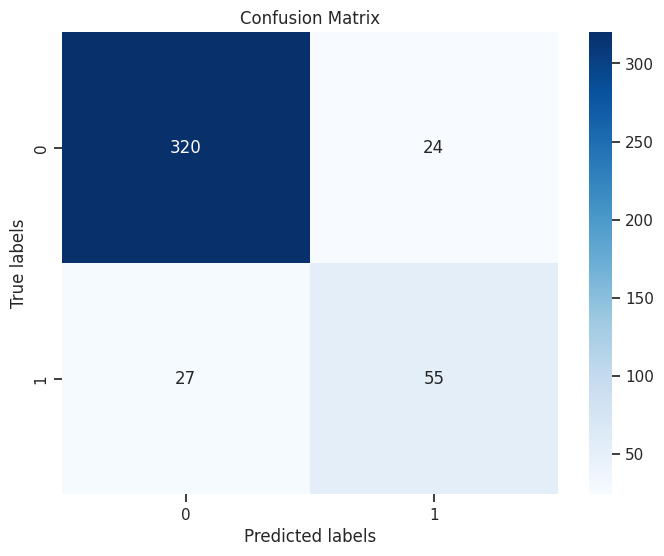

Accuracy: 0.8802816901408451
Recall: 0.800482132728304
Precision: 0.8091963666873381


In [32]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import svm
import numpy as np
import pandas as pd
from tabulate import tabulate


GausNB = GaussianNB()
GausNB.fit(X_train, y_train)

y_expect = y_test
y_pred = GausNB.predict(X_test)
print("Score:", accuracy_score (y_expect, y_pred))

# Creamos la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Creamos una figura y ejes de matplotlib
plt.figure(figsize=(8, 6))

# Usamos seaborn para crear un mapa de calor de la matriz de confusión
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')

# Añadimos etiquetas y título
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')

# Mostramos la matriz de confusión
plt.show()

print("Accuracy:",metrics.accuracy_score(y_test, y_pred)) # Creamos métrica de "Accuracy" y mostramos
print("Recall:",metrics.recall_score(y_test,y_pred,average='macro')) # Creamos métrica de "Recall" y mostramos
print("Precision:",metrics.precision_score(y_test,y_pred,average='macro')) # Creamos métrica de "Precision" y mostramos